<a href="https://colab.research.google.com/github/layan17/Soccer-Prediction/blob/master/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Upload the Raw Data


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving soccer.csv to soccer.csv
User uploaded file "soccer.csv" with length 38701 bytes


###Reading our imported data

In [4]:
import pandas as pd

df = pd.read_csv("soccer.csv")
df.head()


,Date,HomeTeam,AwayTeam,FTHomeGoal,FTAwayGoal,FTResult,HalfTHG,HalfTAG,HalfTR
0,10/8/2018,Man United,Leicester,2,1,H,1,0,H
1,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,H
2,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,A
3,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,A
4,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,A


###Change H = 1, A = 0, D = 2

In [0]:
def HalfTR_toNumber(x):
  if x == 'H':
    return 1
  if x == 'A':
    return -1
  if x == 'D':
    return 0
  
 

In [6]:
df['Trans_HalfTR'] =  df['HalfTR'].apply(HalfTR_toNumber)
df['Trans_FTResult'] =  df['FTResult'].apply(HalfTR_toNumber)
df.head()

,Date,HomeTeam,AwayTeam,FTHomeGoal,FTAwayGoal,FTResult,HalfTHG,HalfTAG,HalfTR,Trans_HalfTR,Trans_FTResult
0,10/8/2018,Man United,Leicester,2,1,H,1,0,H,1,1
1,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,H,1,1
2,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,A,-1,-1
3,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,A,-1,-1
4,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,A,-1,-1


###Dropping the FTResult and  HalfTR column

In [0]:
df.drop(['FTResult'], axis = 1, inplace = True)
df.drop(['HalfTR'], axis = 1, inplace = True)

In [8]:
df.head()

,Date,HomeTeam,AwayTeam,FTHomeGoal,FTAwayGoal,HalfTHG,HalfTAG,Trans_HalfTR,Trans_FTResult
0,10/8/2018,Man United,Leicester,2,1,1,0,1,1
1,11/8/2018,Bournemouth,Cardiff,2,0,1,0,1,1
2,11/8/2018,Fulham,Crystal Palace,0,2,0,1,-1,-1
3,11/8/2018,Huddersfield,Chelsea,0,3,0,2,-1,-1
4,11/8/2018,Newcastle,Tottenham,1,2,1,2,-1,-1


###Create NewTable with columns: Team, Home Goals Score(HGS), Away Goals Score(AGS), Home Attack Strength(HAS),  Home Attack Strength(AAS), Home Goals Conceded(HGC), Away Goals Conceded(AGC), Away Defensive Strength(ADS), Home Defensive Strength(HDS)

In [0]:
NewTable = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS','N_FTResult', 'N_HTResult' ))
NewTable = NewTable

In [10]:
res = df
res.head()

,Date,HomeTeam,AwayTeam,FTHomeGoal,FTAwayGoal,HalfTHG,HalfTAG,Trans_HalfTR,Trans_FTResult
0,10/8/2018,Man United,Leicester,2,1,1,0,1,1
1,11/8/2018,Bournemouth,Cardiff,2,0,1,0,1,1
2,11/8/2018,Fulham,Crystal Palace,0,2,0,1,-1,-1
3,11/8/2018,Huddersfield,Chelsea,0,3,0,2,-1,-1
4,11/8/2018,Newcastle,Tottenham,1,2,1,2,-1,-1


###Finding total average of home goal scored and conceded by Home and Away Team 

In [11]:
avg_home_scored = res.FTHomeGoal.sum()*1.0 / res.shape[0]
avg_away_scored = res.FTAwayGoal.sum()*1.0 / res.shape[0]
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print("Average number of goals at home",avg_home_scored)
print("Average number of goals away", avg_away_scored)
print("Average number of goals conceded at home",avg_home_conceded)
print("Average number of goals conceded away",avg_away_conceded)

Average number of goals at home 1.5591397849462365
Average number of goals away 1.1913978494623656
Average number of goals conceded at home 1.1913978494623656
Average number of goals conceded away 1.5591397849462365


###Calculating the team's -  Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), and Away Defensive Strength(ADS)

In [12]:

NewHome = res.groupby('HomeTeam')
NewAway = res.groupby('AwayTeam')
NewHome
NewAway

In [13]:
Num_game = df.shape[0]/20
NewTable.Team = NewHome.HomeTeam.all().values
NewTable.HGS = NewHome.FTHomeGoal.sum().values
NewTable.AGS = NewAway.FTAwayGoal.sum().values
NewTable.HGC = NewHome.FTAwayGoal.sum().values
NewTable.AGC = NewAway.FTHomeGoal.sum().values
NewTable.HAS = (NewTable.HGS / Num_game) / avg_home_scored
NewTable.AAS = (NewTable.AGS / Num_game) / avg_home_scored
NewTable.HDS = (NewTable.HGC / Num_game) / avg_home_scored
NewTable.ADS = (NewTable.AGC / Num_game) / avg_home_scored
NewTable.N_FTResult = df['Trans_FTResult']
NewTable.N_HTResult = df['Trans_HalfTR']

NewTable.head()



,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS,N_FTResult,N_HTResult
0,Arsenal,110,78,1.517241,1.075862,44,74,0.606897,1.020690,1,1
1,Bournemouth,75,50,1.034483,0.689655,73,83,1.006897,1.144828,1,1
2,Brighton,37,17,0.510345,0.234483,35,43,0.482759,0.593103,-1,-1
3,Burnley,51,39,0.703448,0.537931,52,75,0.717241,1.034483,-1,-1
4,Cardiff,12,5,0.165517,0.068966,15,18,0.206897,0.248276,-1,-1


###Plot chart of HAS against the teams

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


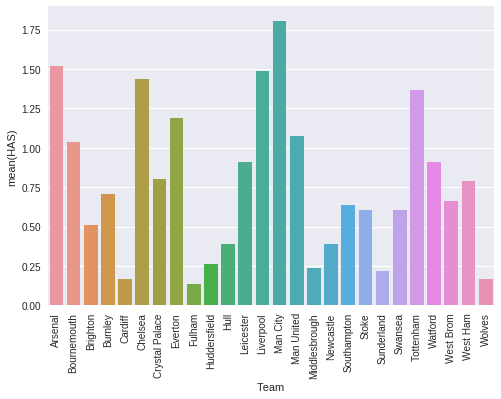

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
has_plot = sns.barplot(NewTable.Team,NewTable.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

###Setting the x_train and y_train to get the prediction model.

In [0]:

X_train = NewTable[['HAS','HDS','AAS','ADS',]]
y_train = NewTable['N_FTResult']


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()



In [0]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=7)
print(scores)
print(scores.mean())

In [0]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

In [0]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

In [20]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.25       0.25       0.33333333 0.33333333 0.66666667 0.66666667
 0.5        0.5        1.         1.        ]
0.55


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


###Create "UpdatedTable" to include the upcoming fixtures

In [0]:
UpdatedTable = df[['HomeTeam','AwayTeam']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in UpdatedTable.iterrows():
    f_HAS.append(NewTable[NewTable['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(NewTable[NewTable['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(NewTable[NewTable['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(NewTable[NewTable['Team'] == row['AwayTeam']]['ADS'].values[0])
    
UpdatedTable['HAS'] = f_HAS
UpdatedTable['HDS'] = f_HDS
UpdatedTable['AAS'] = f_AAS
UpdatedTable['ADS'] = f_ADS
UpdatedTable['Result'] = df['Trans_FTResult']

In [102]:
UpdatedTable

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,Result
0,Man United,Leicester,1.075862,0.441379,0.813793,1.227586,1
1,Bournemouth,Cardiff,1.034483,1.006897,0.068966,0.248276,1
2,Fulham,Crystal Palace,0.137931,0.248276,0.703448,1.117241,-1
3,Huddersfield,Chelsea,0.262069,0.496552,1.075862,0.620690,-1
4,Newcastle,Tottenham,0.386207,0.441379,1.268966,0.648276,-1
5,Watford,Brighton,0.910345,1.034483,0.234483,0.593103,1
6,Wolves,Everton,0.165517,0.151724,0.606897,1.062069,0
7,Arsenal,Man City,1.517241,0.606897,1.420690,0.537931,-1
8,Liverpool,West Ham,1.489655,0.413793,0.868966,1.186207,1
9,Southampton,Burnley,0.634483,0.813793,0.537931,1.034483,0


In [103]:

feat_table = pd.DataFrame(columns = ['HomeTeam', 'AwayTeam'])
feat_table 


,HomeTeam,AwayTeam


In [106]:

new_fixtures = pd.DataFrame( {'HomeTeam' :['West Ham','Arsenal',
                             'Liverpool', 'Man City'], 'AwayTeam':['West Brom',
                             'Man United','Bournemouth', 'West Ham']}
                            )
new_fixtures

,AwayTeam,HomeTeam
0,West Brom,West Ham
1,Man United,Arsenal
2,Bournemouth,Liverpool
3,West Ham,Man City


In [0]:


f_HAS =[]
f_HDS =[]
f_ADS =[]
f_AAS =[]

for index, row in new_fixtures.iterrows():
    #print row
    f_HAS.append(NewTable[NewTable['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(NewTable[NewTable['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(NewTable[NewTable['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(NewTable[NewTable['Team'] == row['HomeTeam']]['ADS'].values[0])

    
   
new_fixtures['HAS'] = f_HAS
new_fixtures['HDS'] = f_HDS
new_fixtures['ADS'] = f_ADS
new_fixtures['AAS'] = f_AAS



In [108]:
new_fixtures

,AwayTeam,HomeTeam,HAS,HDS,ADS,AAS
0,West Brom,West Ham,0.786207,0.979310,1.186207,0.868966
1,Man United,Arsenal,1.517241,0.606897,1.020690,1.075862
2,Bournemouth,Liverpool,1.489655,0.413793,0.786207,1.255172
3,West Ham,Man City,1.806897,0.510345,0.537931,1.420690


In [109]:
test_table = new_fixtures
test_table

,AwayTeam,HomeTeam,HAS,HDS,ADS,AAS
0,West Brom,West Ham,0.786207,0.979310,1.186207,0.868966
1,Man United,Arsenal,1.517241,0.606897,1.020690,1.075862
2,Bournemouth,Liverpool,1.489655,0.413793,0.786207,1.255172
3,West Ham,Man City,1.806897,0.510345,0.537931,1.420690


In [110]:
new_feat_table = new_fixtures.append(UpdatedTable,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
feat_table = new_feat_table
feat_table.shape

(934, 7)

In [111]:
feat_table.head(10)

,AAS,ADS,AwayTeam,HAS,HDS,HomeTeam,Result
933,0.868966,1.186207,West Brom,0.786207,0.979310,West Ham,NaN
932,1.075862,1.020690,Man United,1.517241,0.606897,Arsenal,NaN
931,1.255172,0.786207,Bournemouth,1.489655,0.413793,Liverpool,NaN
930,1.420690,0.537931,West Ham,1.806897,0.510345,Man City,NaN
929,0.813793,1.227586,Leicester,1.075862,0.441379,Man United,1.0
928,0.068966,0.248276,Cardiff,1.034483,1.006897,Bournemouth,1.0
927,0.703448,1.117241,Crystal Palace,0.137931,0.248276,Fulham,-1.0
926,1.075862,0.620690,Chelsea,0.262069,0.496552,Huddersfield,-1.0
925,1.268966,0.648276,Tottenham,0.386207,0.441379,Newcastle,-1.0
924,0.234483,0.593103,Brighton,0.910345,1.034483,Watford,1.0


In [112]:
num_games = feat_table.shape[0]-10
num_games

924

In [113]:
num_games = feat_table.shape[0]-10
print(num_games)
n_split = 15
n_games = num_games - n_split
n_games

924


909

In [114]:
UpdatedTable.head()

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,Result
0,Man United,Leicester,1.075862,0.441379,0.813793,1.227586,1
1,Bournemouth,Cardiff,1.034483,1.006897,0.068966,0.248276,1
2,Fulham,Crystal Palace,0.137931,0.248276,0.703448,1.117241,-1
3,Huddersfield,Chelsea,0.262069,0.496552,1.075862,0.620690,-1
4,Newcastle,Tottenham,0.386207,0.441379,1.268966,0.648276,-1


###Training and Testing the models

In [0]:

X_train = UpdatedTable[['HAS','HDS','AAS','ADS',]].loc[0:n_games]
y_train = UpdatedTable['Result'].loc[0:n_games]
X_test = UpdatedTable[['HAS','HDS','AAS','ADS',]].loc[n_games:num_games-1]
y_test = UpdatedTable[['Result']].loc[n_games:num_games-1]

In [0]:
#Xgboost
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)
    
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)



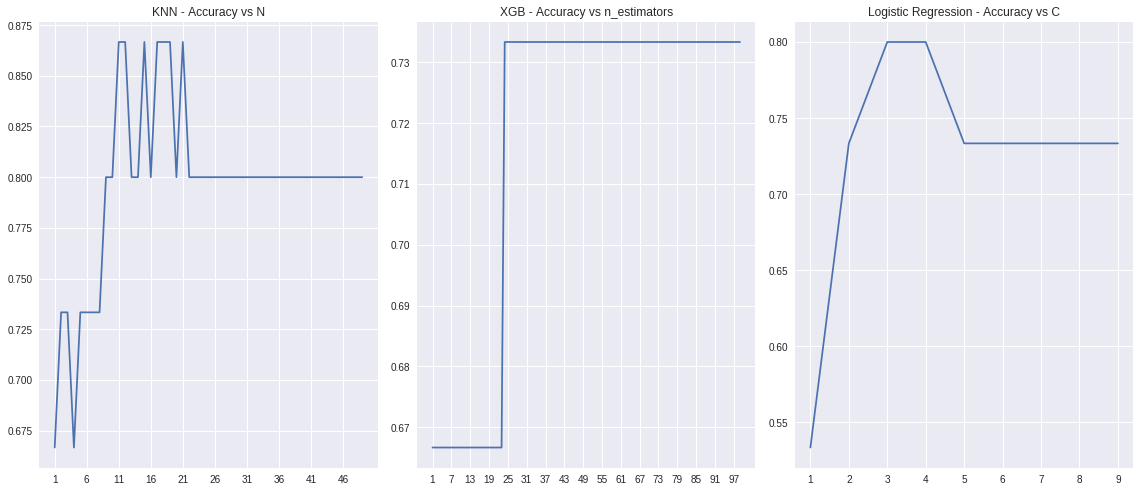

In [117]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')


ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")



ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [0]:
max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)



In [119]:
print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

0.8666666666666667 10
0.7333333333333333 23
0.8 2


In [0]:
X_predict = feat_table[['HAS','HDS','AAS','ADS']]

In [0]:
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_knn = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [126]:
X_predict.head()

,HAS,HDS,AAS,ADS
933,0.786207,0.979310,0.868966,1.186207
932,1.517241,0.606897,1.075862,1.020690
931,1.489655,0.413793,1.255172,0.786207
930,1.806897,0.510345,1.420690,0.537931
929,1.075862,0.441379,0.813793,1.227586


In [0]:
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)
y_pred_knn = clf_knn.predict(X_predict)

###Making prediction of the upcoming fixtures

In [125]:
this_week = feat_table[['HomeTeam','AwayTeam']]
this_week['Result_XGB']=y_pred_XGB
this_week['Result_knn']=y_pred_knn
this_week['Result_logreg']=y_pred_logreg

this_week.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,HomeTeam,AwayTeam,Result_XGB,Result_knn,Result_logreg
933,West Ham,West Brom,1,-1,-1
932,Arsenal,Man United,1,1,1
931,Liverpool,Bournemouth,1,1,1
930,Man City,West Ham,1,1,1
929,Man United,Leicester,1,1,1


##Ways to improve our accuracy in the future



###Including the current player strength of each of the team. Some team have players that are injured and will definitely affect the team performance. Also, we can include the team's other game statistics like passes, corners, possession, and so on.



